<a href="https://colab.research.google.com/github/Daleth-Barreto/Diabetes-Prediction-Model/blob/main/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install kagglehub pandas matplotlib seaborn -q

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [40]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# 👀 Vista general
print("Shape:", df.shape)
display(df.head())

# 📊 Estadísticas básicas
print("\nResumen estadístico:")
display(df.describe())



Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Resumen estadístico:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


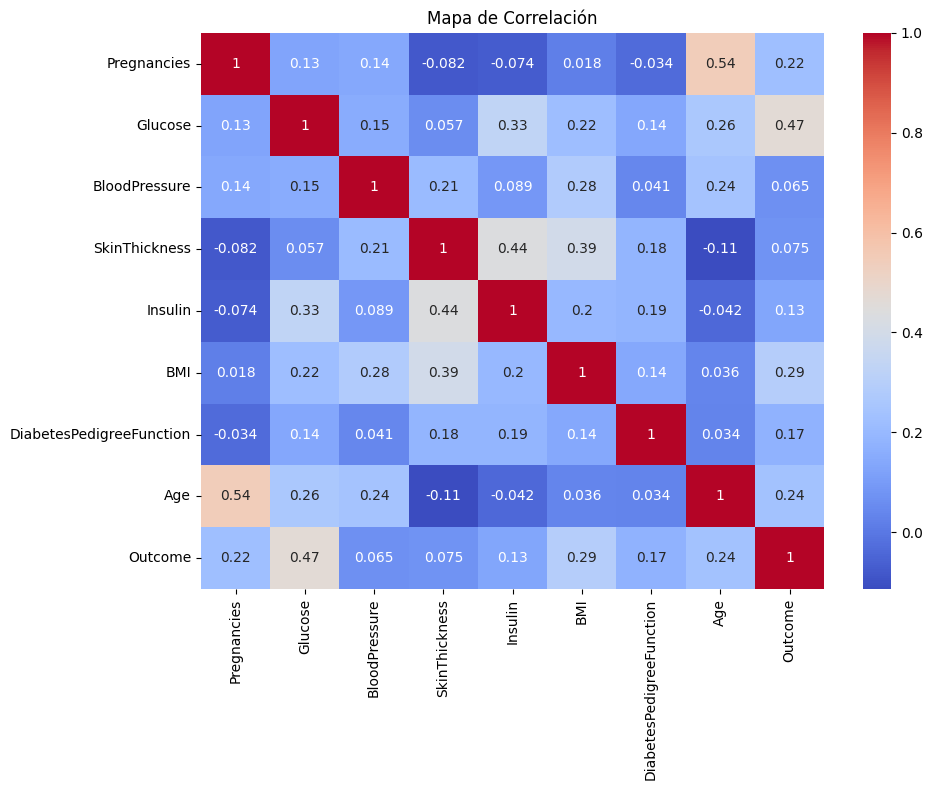

In [41]:
# 🔍 Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 📉 Visualización de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlación")
plt.tight_layout()
plt.show()


In [42]:

# 📌 Separar variables
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# ⚖️ Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Predicciones
y_pred = model.predict(X_test)

# 📈 Evaluación
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("✅ Precisión:", round(accuracy_score(y_test, y_pred)*100, 2), "%")



📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

✅ Precisión: 72.73 %


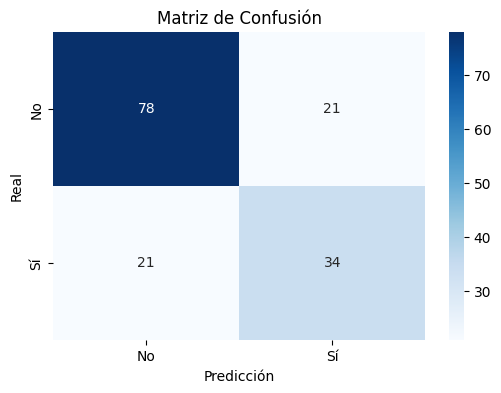

In [44]:

# 📉 Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()



In [51]:
columnas = df.columns[:-1]
valores = [float(input(f"{col}: ")) for col in columnas]
ejemplo = np.array([valores])
# Convertir a DataFrame con los nombres de columna
ejemplo_df = pd.DataFrame(ejemplo, columns=columnas)
ejemplo_esc = scaler.transform(ejemplo_df)
pred = model.predict(ejemplo_esc)
print("¿Tiene diabetes?:", "Sí" if pred[0] == 1 else "No")


Pregnancies: 3
Glucose: 127
BloodPressure: 72
SkinThickness: 20
Insulin: 0
BMI: 25.5
DiabetesPedigreeFunction: 0
Age: 28
¿Tiene diabetes?: No
